<a href="https://colab.research.google.com/github/Carol-Coutinho/OU3/blob/main/Flash_N%C3%A3o_Ideal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tanque Flash Não Ideal**

Operações Unitárias 3

Caroline Coutinho

2021/1

## Parte 1: Explanação Teórica

Dentro do contexo de operações unitárias na indústria química, o tambor de Flash pode ser considerado uma destilação em simples estágio. Seu objetivo é separar dois ou mais componentes de uma corrente de entrada (F) em função de suas volatilidades. Ou seja, na saída do tambor é gerada uma corrente de topo (V) com o componente mais volátil e uma corrente de fundo (L) com o componente menos volátil. 

A imagem a seguir ilustra o sistema: 

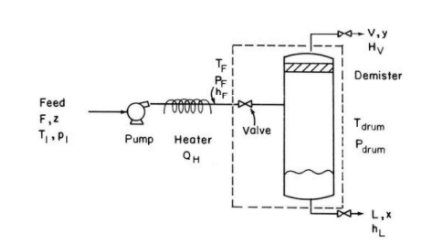

O principal conceito que nos ajuda a entender esse sistema é o que chamamos de **equilíbrio líquido-vapor (ELV**), no qual dentro do vaso de Flash, a uma certa temperatura e pressão, se encontram em equilíbrio as fases líquidas e vapor.

O ELV pode ser determinado matematicamente através da denominada Lei de Raoult:

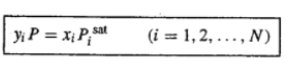

No entanto, essa equação é baseada em duas principais hipóteses: 

- O vapor é um gás ideal.

- A fase líquida é uma solução ideal.

Dessa forma, para um modelo de tambor de flash não ideal, a Lei de Raoult se torna ineficaz ao descrever o sistema. 


Pensando nisso, foi desenvolvida a abordagem Gamma/Phi, no qual se utiliza a Lei de Raoult Modificada, dada pela equação a seguir:

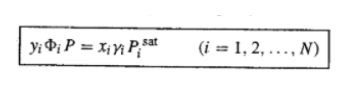

Nessa abordagem são inseridos dois novos fatores:

- Coeficiente de atividade (ℽ) 
- Coeficiente de fugacidade(Φ).

O coeficiente de atividade (ℽ) é responsável por predizer o quão afastado da idealidade uma espécie em solução está. Pode ser determinado através da correlação de Margules.

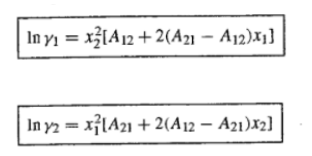

Já o  coeficiente de fugacidade (Φ), a grosso modo, é responsável por predizer o quão afastado do conceito de gás ideal os componentes na fase vapor estão. As equações de estado de Virial são capazes de predizer os valores desse coeficiente. 

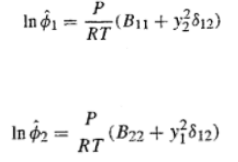

## Parte 2: Objetivo

O principal objetivo desse estudo é modelar e simular um Tanque Flash Não Ideal para um sistema binário, dadas as condições de entrada da carga e a condição do Flash,  de modo a obter as vazões de saída de vapor e líquido, além de suas respectivas composições.

## Parte 3: Modelagem Matemática do Sistema

Primeiro iremos identificar as variáveis conhecidas e incógnitas do nosso sistema. 

|Variáveis conhecidas|Incógnitas|
|:------------------:|:--------:|
|    $$P_{Flash}$$   |    x     |
|    $$T_{Flash}$$   |    y     |
|      $$z_F$$       |    V     |
|        F           |    L     |
|    $$P^{sat}$$     |$$\gamma$$|
|                    | $$\phi$$ |

Fazendo uma análise acerca dos graus de liberdade, podemos observar que em relação às incógnitas temos 2 NC + 4, o que se tratando de um sistema binário, nos retorna:

$$N.E = 2\cdot 2 + 4$$
$$N.E = 8 $$

Logo serão necessárias no mínimo 8 equações para que possamos determinar uma solução do nosso sistema. 

Dessa forma, podemos especificar as seguintes equações:

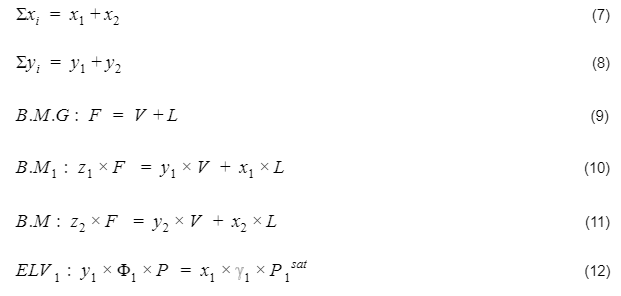

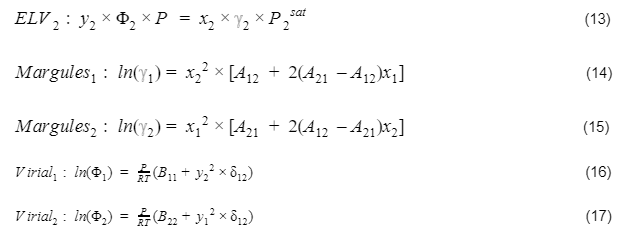

Na resolução proposta serão utilizadas as seguintes equações: 7,8,9,10,12,13, 14,15,16,17.
Observe que tanto as equações de Margules, quanto as equações de Virial são dependentes das composições dos componentes nas fases vapor e líquida, que também são incógnitas, logo, teremos um problema de cálculo interativo. 


Essa abordagem de cálculo interativo é retratada no esquema a seguir:

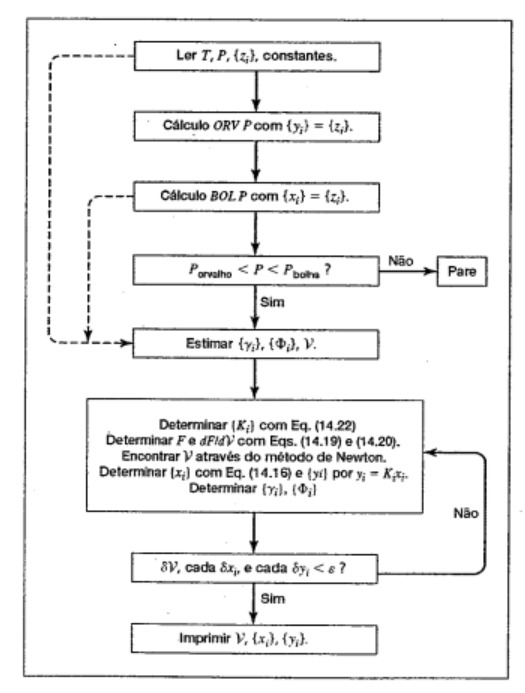

## *Escrever a partir daqui*

## Parte 4: Preparando o sistema:

## Dados iniciais acerca do modelo:

Mistura fornecida na corrente de entrada F: 

1- Dietil-Cetona

2- N-Hexano


Condição do flash:
P = 1 atm
T = 334,15 K

|Espécie (i) | $$z_i$$ |
|:-----------|:-------:|
|DiEtil-Cetona (1)| 0.5 |
|N-hexano (2)  | 0.5 |


Primeiro vamos preparar o Kernel:

In [ ]:
# Preparando kernel
import pandas as pd
import pickle as pickl
#!pip3 install pickle5
#import pickle5 as pickl
import numpy as np
import matplotlib.pyplot as plt
#import statistics as sta
#import math as mth

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Para ler/carregar
#with open('/content/drive/MyDrive/OU_3/databank_properties.pickle', 'rb') as handle:
#with open('/content/drive/MyDrive/Classroom/OpUnit3_files/OU3_Python/databank_properties.pickle', 'rb') as handle:
with open('databank_properties.pickle', 'rb') as handle:
    dados, all_units = pickl.load(handle)

In [ ]:
# Carregamento das funções úteis
from OU3_funcoes_uteis_v02 import *


Analisando o banco de dados e buscando os componentes do falsh:


In [ ]:
dados.shape

(468, 31)

In [ ]:
dados.columns

Index(['num', 'name', 'molar_mass', 'fusion_point', 'boiling_point',
       'critical_temp', 'critical_pressure', 'critical_volume', 'zc',
       'acentric_factor', 'liq_density', 'temp_ref_liq_density',
       'dipole_moment', 'cp_a', 'cp_b', 'cp_c', 'cp_d', 'visc_b', 'visc_c',
       'delta_h0f_gas', 'delta_g0f_gas', 'pvap_a', 'pvap_b', 'pvap_c',
       'temp_max_pvap', 'temp_min_pvap', 'pvap_h_a', 'pvap_h_b', 'pvap_h_c',
       'pvap_h_d', 'delta_h_vap_bp'],
      dtype='object')

In [ ]:
# Buscando o segundo componente: 
filtro2 = dados.name.str.contains('diethyl', case = False)
dados[filtro2]

#Valor encontrado: 215

,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,...,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
28,407,"1,4-DIETHYLBENZENE",134.222,231.0,456.9,657.9,27.7,480.0,0.250,0.403,...,16.1140,3657.22,-71.18,487.0,335.0,NaN,NaN,NaN,NaN,9410.0
117,393,"3,3-DIETHYLPENTANE",128.259,NaN,419.3,610.0,26.4,NaN,NaN,0.338,...,15.8709,3341.62,-57.57,440.0,350.0,NaN,NaN,NaN,NaN,8600.0
215,107,DIETHYL AMINE,45.085,181.0,280.0,437.6,52.4,187.0,0.272,0.288,...,16.2653,2358.77,-35.15,310.0,218.0,67.611,-5350.44,-7.435,2.03,6330.0
216,194,DIETHYL AMINE,73.139,223.4,328.6,496.6,36.6,301.0,0.270,0.299,...,16.0545,2595.01,-53.15,350.0,242.0,64.890,-5912.65,-6.955,3.73,6650.0
217,191,DIETHYL DISULFIDE,122.244,171.7,427.2,642.0,NaN,NaN,NaN,NaN,...,16.0607,3421.57,-64.19,455.0,312.0,NaN,NaN,NaN,NaN,9010.0
218,215,DIETHYL KETONE,86.134,234.2,375.1,561.0,36.9,336.0,0.269,0.347,...,16.8138,3410.51,-40.15,400.0,275.0,111.200,-9773.63,-13.260,4.73,8060.0
219,190,DIETHYL SULFIDE,90.180,169.2,365.3,557.0,39.1,318.0,0.272,0.300,...,15.9531,2896.27,-54.49,390.0,260.0,NaN,NaN,NaN,NaN,7590.0
220,189,DIETHYLENE GLYCOL,106.122,265.0,519.0,681.0,6.0,316.0,0.260,NaN,...,17.0326,4122.52,-122.50,560.0,402.0,NaN,NaN,NaN,NaN,13670.0


In [ ]:
# Buscando o primeiro componente:
filtro1 = dados.name.str.contains('N-HEXANE')
dados[filtro1] 

# Valor encontrado: 271


,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,...,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
354,271,N-HEXANE,86.178,177.8,341.9,507.4,29.3,370.0,0.260,0.296,...,15.8366,2697.55,-48.78,370.0,245.0,57.279,-5587.42,-5.885,4.778,6896.0
401,234,PERFLUORO-N-HEXANE,338.044,186.0,330.3,451.7,18.8,442.0,0.224,0.730,...,15.8307,2488.59,-59.73,330.0,270.0,90.505,-7074.74,-10.780,7.330,0.0


In [ ]:
# O comprimento da lista será o número de componentes:
lista_componentes = [215, 271]
nc = len(lista_componentes)
nc

2

In [ ]:
# Encontrando as temperaturas de ebulição dos componenetes: 
T_eb_comp = dados[dados['num'].isin(lista_componentes)]['boiling_point']
T_eb_comp = T_eb_comp.tolist()
T_eb_comp

[375.1, 341.9]

In [ ]:
# Definindo as condições de composição e pressão do flash

P_flash = 760.0 # mmHg
T_flash = 360.0 - 8.0 # K
z = np.array([0.5, 0.5])
z

array([0.5, 0.5])

## Parte 5: Definindo a função de Margules

Nessa etapa, iremos definir a função de Margules. Essa função é uma correlação para determinar o coeficiente de atividade (gama), para soluções. 

Essas equações para um sistema binário é dada por: 

$$ (1) \ ln(\gamma_1) = x_2^2 \cdot [A_{12} + 2 \cdot (A_{21}- A_{12}) \cdot x_1]$$
$$ (2) \ ln(\gamma_2) = x_1^2 \cdot [A_{21} + 2 \cdot (A_{12}- A_{21}) \cdot x_2]$$

Para isso, iremos usar os dados do exemplo 12.1 do SVNA. Nele são disponibilizados os daods de A_12 e A_21, além de composição de Dietil-Cetona  e n-hexano. 

In [ ]:
# Definindo os parâmetros A12 e A21:
param = [1.153, 0.596]
param

[1.153, 0.596]

In [ ]:
z_marg = [0.834, 0.166] # [x1,x2]

In [ ]:
def margules (z,param):
  ln_gamma1 = (z[1]**2)*(param[0]+ 2*(param[1] - param[0])*z[0])
  ln_gamma2 = (z[0]**2)*(param[1]+ 2*(param[0] - param[1])*z[1])
  gamma1 = np.exp(ln_gamma1)
  gamma2 = np.exp(ln_gamma2)
  return gamma1, gamma2


In [ ]:
coef_ativ = margules(z_marg, param)
coef_ativ

(1.0061895261855789, 1.7214662071964004)

## Parte 6: Definindo a função de Virial.

Essa função é responsável por estmar o coeficiente de fugacidade (phi) para misturas de gases. 

As correlações do tipo virial para uma mistura binária é dada por:

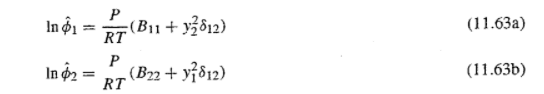



Sendo que os coeficientes B_i,k podem ser determinados por:

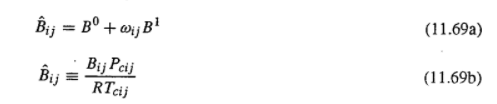

E as outras correlações pertinentes são dadas por: 

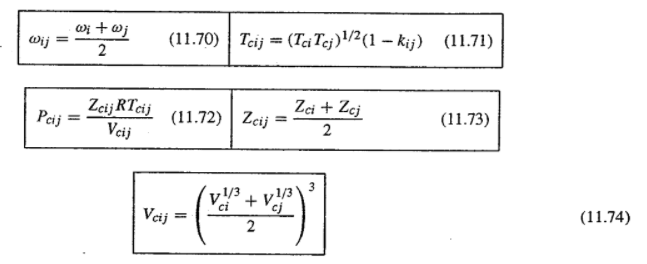

In [ ]:
#dados_virial = pd.DataFrame((Tc, Pc, Vc, omega, Zc), columns=['Dietil-Cetona', 'N-Hexano'])
#dados_virial

In [ ]:
# Dados Gerais:
R = 83.14 # cm3 * bar / (mol * K)
T1 = 50 + 273.15 #K
P = 25000 # Pa
P  = P / 1e5 #bar
y_virial = [0.5,0.5]

In [ ]:
# Definindo a função de B0:
def f_B0 (Tr):
  # Equacao 3.65
  f = 0.083 - 0.422 / ((Tr)**1.6)
  return f

In [ ]:
# Definindo a função de B1:
def f_B1 (Tr):
  # Equacao 3.66
  f = 0.139 - 0.172 / ((Tr)**4.2)
  return f

In [ ]:
def f_phi_bin_virial (T1,P,y,R,dados, lista_componentes):
  # P em bar
  # T em K
  # V em cm3
  #
  # Encontrando as temperaturas críticas dos componenetes: 
  Tc = dados[dados['num'].isin(lista_componentes)]['critical_temp']
  Tc = Tc.tolist()
  #
  nc_virial = len(Tc)
  # Encontrando as pressões críticas dos componenetes: 
  Pc = dados[dados['num'].isin(lista_componentes)]['critical_pressure']
  Pc = Pc.tolist()
  # Encontrando os fatores acentricos dos componenetes: 
  omega = dados[dados['num'].isin(lista_componentes)]['acentric_factor']
  omega = omega.tolist()
  # Encontrando os volumes críticos dos componenetes: 
  Vc = dados[dados['num'].isin(lista_componentes)]['critical_volume']
  Vc= Vc.tolist()
  # Encontrando os volumes críticos dos componenetes: 
  Zc = dados[dados['num'].isin(lista_componentes)]['zc']
  Zc= Zc.tolist()
  # Criando a matriz para K
  k = np.array([[0,0],[0,0]])
  # equacao 11.70
  omega_12 = np.mean(omega)
  omega_m  = [omega[0], omega_12, omega_12, omega[1]]
  omega_m  = np.matrix(omega_m)
  omega_m = np.reshape(omega_m, [nc_virial,nc_virial])
  # equacao 11.71
  Tc_12 = np.sqrt(Tc[0]*Tc[1])*(1-k[0,1])
  # equacao 11.73
  Zc_12 = np.mean(Zc)
  # equacao 11.74
  Vc_12 = (np.mean(Vc)**(1/3))**3
  # equacao 11.72
  Pc_12 = (R * Zc_12 * Tc_12) / Vc_12
  Tr_m = np.zeros(shape = (nc_virial,nc_virial))
  B0_m = np.zeros(shape = (nc_virial,nc_virial))
  B1_m = np.zeros(shape = (nc_virial,nc_virial))
  #
  Tr_m[0,0] = T1 / Tc[0]
  Tr_m[1,1] = T1 / Tc[1]
  Tr_m[0,1] = T1 / Tc_12
  Tr_m[1,0] = Tr_m[0,1] 
  #
  B0_m[0,0] = f_B0(Tr_m[0,0])
  B0_m[1,1] = f_B0(Tr_m[1,1])
  B0_m[0,1] = f_B0(Tr_m[0,1])
  B0_m[1,0] = f_B0(Tr_m[1,0])
  #
  B1_m[0,0] = f_B1(Tr_m[0,0])
  B1_m[1,1] = f_B1(Tr_m[1,1])
  B1_m[0,1] = f_B1(Tr_m[0,1])
  B1_m[1,0] = f_B1(Tr_m[1,0])
  # Combinacao das equacoes 11.69a e 11.69b
  B_chapeu_1 = omega_m * B1_m
  B_chapeu = np.sum([B0_m,B_chapeu_1], axis =1)
  #
  Tc_m = [(Tc[0], Tc_12, Tc_12, Tc[1])]
  Tc_m = np.matrix(Tc_m)
  Tc_m = np.reshape(Tc_m, [nc_virial,nc_virial])
  #
  Pc_m = [Pc[0], Pc_12, Pc_12, Pc[1]]
  Pc_m = np.matrix(Pc_m)
  Pc_m = np.reshape(Pc_m, [nc_virial,nc_virial])
  #
  B_m = (B_chapeu * R * Tc_m) / Pc_m
  # equacao seguinte a 11.64, no final da p.303
  delta_12 = 2 * B_m[0,1] - B_m[0,0] - B_m[1,1]
  #
  ln_phi = np.zeros(shape = (nc_virial,))
  ln_phi[0] = (P/(R*T1)*(B_m[0,0] + y[1]*delta_12)) 
  ln_phi[1] = (P/(R*T1)*(B_m[1,1] + y[0]*delta_12))
  #
  phi = [np.exp(ln_phi[0]), np.exp(ln_phi[1])]
  return ln_phi, phi

In [ ]:
P

0.25

In [ ]:
phi = f_phi_bin_virial(T1, P, y_virial, 83.14, dados, lista_componentes )
phi[1]

[0.9622319281939691, 0.9560732568114947]

## Parte 7: Implementação da abordagem Gamma/Phi com a Lei de Raoult Modificada:

In [ ]:
f_calculo_PbPo_db('P', T_flash, z, lista_componentes, dados)

(883.8152922149893, 689.279742448613, array([ 469.16665329, 1298.46393114]))

In [ ]:
f_calculo_PbPo_db('T', P_flash, z, lista_componentes, dados)

(354.9306264945687, 363.0943451118097, [375.1, 341.9])

In [ ]:
f_sol_RR_flash_db(z, P_flash, T_flash, lista_componentes, dados)

{'fv_flash': 0.6008790479270294,
 'x_eq': array([0.64930146, 0.35069854]),
 'y_eq': array([0.40082973, 0.59917027]),
 'K_comp': array([0.61732454, 1.70850517]),
 'alpha_comp': array([1.        , 2.76759638])}

Fazendo o cálculo como se o sistema fosse ideal para termos nosso chute inicial das composições de líquido e vapor.

In [ ]:
# Utilizando a função pronta para ELV binário baseado na Lei de Raoult:

# Primeiro considerando que o sistema é ideal:
comp = f_sol_ELV_2c_db(T_flash, P_flash, lista_componentes, dados)
comp

(array([0.64930146, 0.35069854]), array([0.40082973, 0.59917027]))

In [ ]:
y_0 = comp[1]
y_0

array([0.40082973, 0.59917027])

In [ ]:
x_0 = comp[0]
x_0

array([0.64930146, 0.35069854])

In [ ]:
param_marg = [1.153, 0.596]

In [ ]:
def f_K_nao_ideal_db(T_eq, P_eq, x_eq, y_eq, lista_componentes, dados):
  ''' Cálculo do K com Raoult modificado e segundo a abordagem
        gamma / phi sendo:
        gamma: calculado pelo modeo de Margules
        phi: calculado pela EOS tipo virial
  '''
  P_vap_1 = f_Pvap_Antoine_db(T_eq, lista_componentes[0], dados)
  P_vap_2 = f_Pvap_Antoine_db(T_eq, lista_componentes[1], dados)
  P_vap = np.array([P_vap_1[0], P_vap_2[0]])
  # P em mmHg
  P_bar = (P_eq/760.0)*1.01325 # em bar
  phi = np.array(f_phi_bin_virial(T_eq, P_bar, y_eq, R, dados,
                                  lista_componentes)[1]) #retorna um array
  gamma = np.array(margules(x_eq, param_marg)) # retorna um vetor
  num_k = gamma*P_vap
  dem_k = phi*P_eq
  K = num_k/dem_k
  return K

In [ ]:
# Alteração da função de resíduos de RR: 
# Nesse caso o K aqui não é calculado e sim passado como parâmetros

def f_res_RR_flash_db_not_ideal(fv, z, P, Temp, x, y, lista_componentes, dados):
    ''' Função que determina o resíduo da equação de Rachford-Rice para o flash
        multicomponente na solução para encontrar fv (fração vaporizada da carga)
      Entrada:
      fv - fração vaporizada da carga - variável implícita
      z - composição da carga em fração molar
      P - pressão do flash em mmHg
      T - temperatura do flash em K
      lista_componentes - lista com os números de identificação dos componentes
                          do sistema correspondente ao 
                          databank_properties.pickle
      dados - dataframe com os dados do databank
      Saidas:
      res - resíduo na busca da solução - res = 0 -> solução
    '''
    nc = len(lista_componentes)
    #print(type(fv))
    if (type(fv) == float):
      fv = np.array([fv])
      nr = len(fv)
    else:
      nr = 1
    # if (type(fv) == float64):
    #   nr = fv.shape[0]
    K_comp = f_K_nao_ideal_db(Temp, P, x, y, lista_componentes, dados)
    M_parc = np.zeros((nr, nc))
    num = z * K_comp
    if (type(fv) == float):
      fv_vez = fv
      den = 1.0 + fv_vez*(K_comp - 1.0)
      i = 0
      M_parc[i,:] = num / den
    elif (isinstance(fv, np.floating)):
      fv_vez = float(fv)
      den = 1.0 + fv_vez*(K_comp - 1.0)
      i = 0
      M_parc[i,:] = num / den
    else:
      for i, fv_vez in enumerate(fv):
        den = 1.0 + fv_vez*(K_comp - 1.0)
        M_parc[i,:] = num / den
    res = 1.0 - np.sum(M_parc, axis=1)
    return res

In [ ]:
from scipy.optimize import brent

In [ ]:
## Modificando a função para sistema não ideal
def f_sol_RR_flash_not_ideal_db(z, P, Temp, x, y, lista_componentes, dados):
    ''' Função que resolve a equação de Rachford-Rice e encontra a fv 
        (fração vaporizada da carga)
        Entrada:
        z - composição da carga em fração molar
        P - pressão do flash em mmHg
        T - temperatura do flash em K
        lista_componentes - lista com os números de identificação dos componentes
                          do sistema correspondente ao 
                          databank_properties.pickle
        dados - dataframe com os dados do databank
        Saidas: {dicionário}
        fv_flash - fração vaporizada - solução do flash
        x_eq - composição do líquido no equilíbrio
        y_eq - composição do vapor no equilíbrio
        K_comp - volatilidade dos componentes
        alpha_comp - volatilidade relativa em relação ao componente chave pesado (i_chk)
    '''
    fv_guest = 0.5
    fv_flash = fsolve(f_res_RR_flash_db_not_ideal, fv_guest, 
                      args=(z, P, Temp, x, y, lista_componentes, dados))[0]
    #
    # fv_flash = brent(f_res_RR_flash_db_not_ideal,
    #                  args=(z, P, Temp, x, y, lista_componentes, dados),
    #                  brack=(0.00001,0.99999))
    #
    fv_flash = float(fv_flash)
    K_comp = f_K_nao_ideal_db(Temp, P, x, y, lista_componentes, dados)
    num = z * K_comp
    den = 1.0 + fv_flash*(K_comp - 1.0)
    y_eq = num / den
    x_eq = y_eq / K_comp
    i_chk = np.argmin(K_comp)
    alpha_comp = K_comp/K_comp[i_chk]
    return {'fv_flash': fv_flash, 'x_eq': x_eq, 'y_eq': y_eq, 'K_comp': K_comp,
            'alpha_comp':alpha_comp}

In [ ]:
phi = np.array(f_phi_bin_virial(T_flash, P, y_0, R, dados, lista_componentes)[1])
phi

array([0.96548223, 0.96974873])

In [ ]:
z,P_flash,T_flash

(array([0.5, 0.5]), 760.0, 352.0)

In [ ]:
lista_componentes

[215, 271]

In [ ]:
x_0, x_0.sum()

(array([0.64930146, 0.35069854]), 0.9999999999999999)

In [ ]:
y_0, y_0.sum()

(array([0.40082973, 0.59917027]), 1.0)

In [ ]:
f_K_nao_ideal_db(T_flash, P_flash, x_0, y_0, lista_componentes, dados)

array([0.5708207 , 2.33360174])

In [ ]:
f_res_RR_flash_db_not_ideal(0.9, z, P_flash, T_flash, x_0, y_0, lista_componentes, dados)

array([0.00465854])

In [ ]:
brent(f_res_RR_flash_db_not_ideal,
                     args=(z, P_flash, T_flash, x_0, y_0, lista_componentes, dados),
                     brack=(0.00001,0.99999))

-0.7498490509481547

In [ ]:
f_sol_RR_flash_not_ideal_db(z, P_flash, T_flash, x_0, y_0,  lista_componentes, dados)

{'fv_flash': 0.7900897107938727,
 'x_eq': array([0.75653283, 0.24346717]),
 'y_eq': array([0.4318446, 0.5681554]),
 'K_comp': array([0.5708207 , 2.33360174]),
 'alpha_comp': array([1.        , 4.08815194])}

In [ ]:
# Definindo a função de cálculo do flash com arbodagem Gamma/Phi:
def f_flash_nao_ideal (z, P, Temp, lista_componentes, dados):
  ''' Função para cálculo ELV com a Lei de Raoult Modificada para um 
  sistema binário não-ideal.
  '''
  tolerancia = 0.001
  interacao = 0
  erro_x = 100.0
  erro_y = 100.0
  #
  # Solução do flash ideal
  #
  sol_fi = f_sol_RR_flash_db(z, P, Temp, lista_componentes, dados)
  #
  x_0_i = sol_fi['x_eq']
  y_0_i = sol_fi['y_eq']
  #
  while np.all(np.array([erro_x,erro_y])>tolerancia):
    #
    fv = f_sol_RR_flash_not_ideal_db(z, P, Temp, x_0_i, y_0_i, lista_componentes, dados)
    #
    x_0_att = fv['x_eq'] 
    y_0_att = fv['y_eq'] 
    #
    erro_x = abs(fv['x_eq'] - x_0_i) 
    erro_y = abs(fv['y_eq'] - y_0_i)
    #
    interacao += 1
    #
    x_0_i = x_0_att[:]
    y_0_i = y_0_att[:]
  #
  x_final = x_0_i[:]
  y_final = y_0_i[:]
  #
  return {'fv': fv['fv_flash'], 'x_eq': x_final, 'y_eq': y_final, 'n_iter': interacao, 'erro_x': erro_x, 'erro_y': erro_y}

In [ ]:
sol = f_flash_nao_ideal (z, P_flash, T_flash, lista_componentes, dados)
sol

{'fv': 0.7888941501432831,
 'x_eq': array([0.77638082, 0.22361918]),
 'y_eq': array([0.42604127, 0.57395873]),
 'n_iter': 4,
 'erro_x': array([0.00171558, 0.00171558]),
 'erro_y': array([2.9089461e-05, 2.9089461e-05])}

## Verificação!

In [ ]:
sol[1].sum()

0.9999999999999571

In [ ]:
tolerancia = 0.01
interacao = 0
erro_x = 100.0
erro_y = 100.0

In [ ]:
sol_fi = f_sol_RR_flash_db(z, P_flash, T_flash, lista_componentes, dados)
#
x_0_i = sol_fi['x_eq']
y_0_i = sol_fi['y_eq']
x_0_i, y_0_i

(array([1.0647616 , 0.36784896]), array([0.5, 0.5]))

In [ ]:
np.all(np.array([erro_x,erro_y])>tolerancia)

True

In [ ]:
fv = f_sol_RR_flash_not_ideal_db(z, P_flash, T_flash, x_0_i, y_0_i, lista_componentes, dados)
#
x_0_att = fv['x_eq'] 
y_0_att = fv['y_eq']
#
x_0_att, y_0_att

(array([0.89221358, 0.10778642]), array([0.47964559, 0.52035441]))